Mount google drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


If you don't have a directory for blob detection make one here

In [4]:
%cd /content/drive/My\ Drive
!mkdir blobDetection

/content/drive/My Drive
mkdir: cannot create directory ‘blobDetection’: File exists


Otherwise just change directory to 

In [9]:
%cd /content/drive/My\ Drive/blobDetection

/content/drive/My Drive/blobDetection


Here is where we will use OpenCV to do some image analysis.  We will start with blob detection

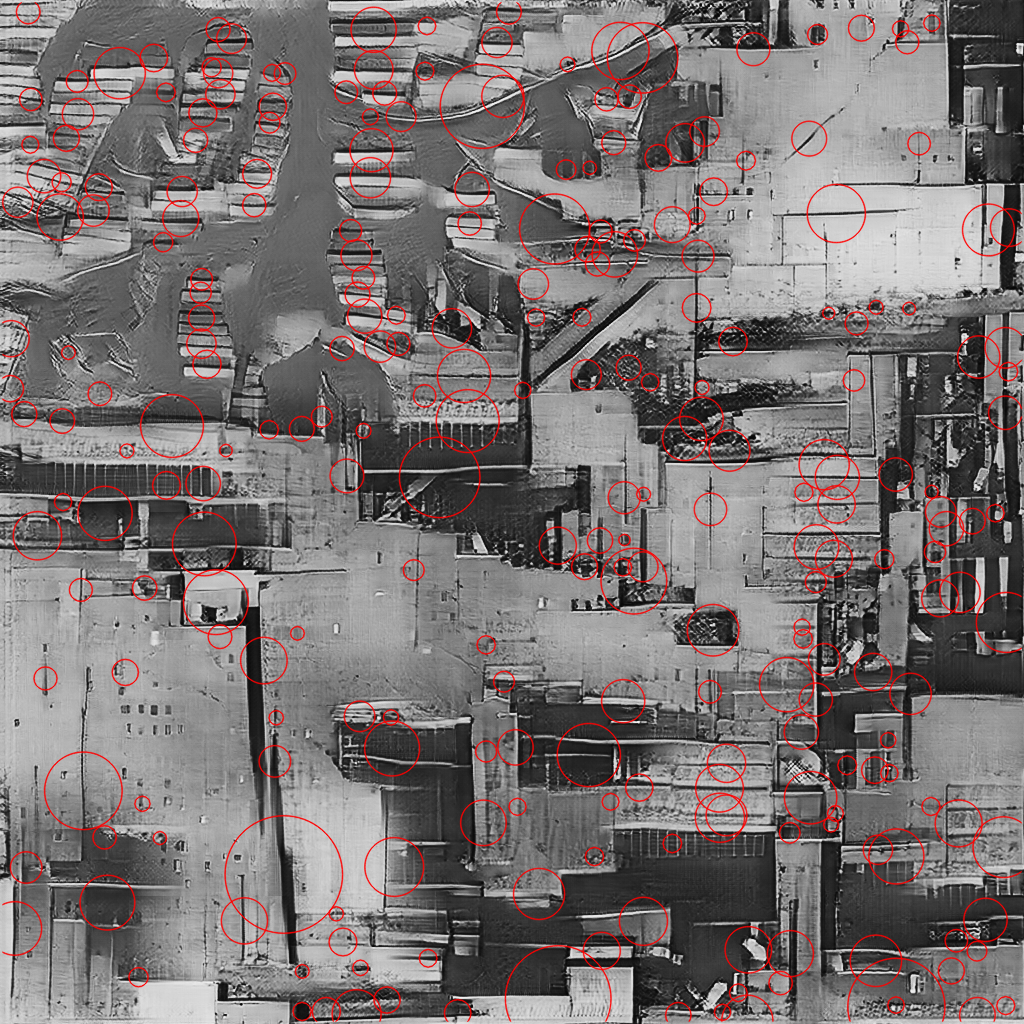

-1

In [24]:
# Standard imports
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Read image
im = cv2.imread("Trial3_C.png", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 20
params.maxThreshold = 250


# Filter by Area.
params.filterByArea = True
# size of selection
params.minArea = 100

# Filter by Circularity circleness
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity completeness of circle
params.filterByConvexity = False
params.minConvexity = 0.87
    
# Filter by Inertia elongation of circle
params.filterByInertia = False
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
cv2_imshow(im_with_keypoints)
cv2.waitKey(0)

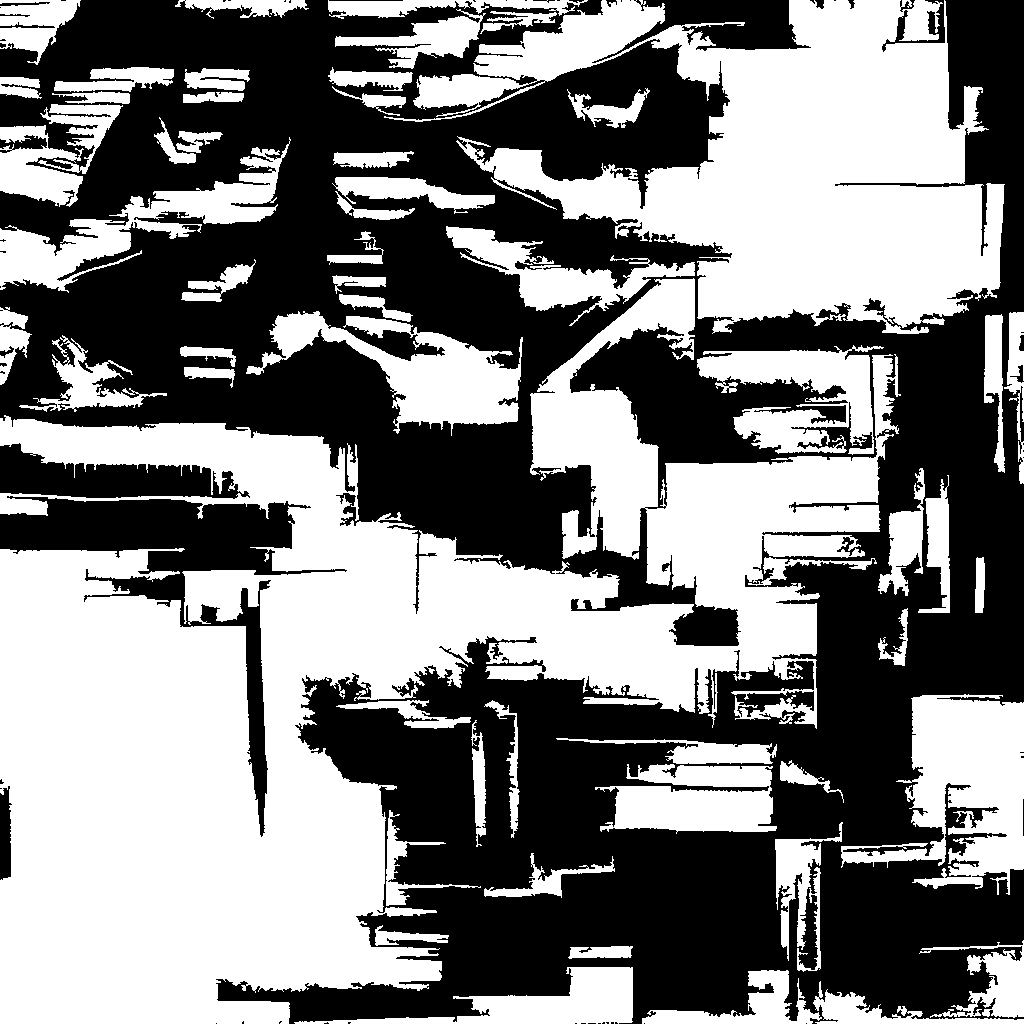

-1

In [48]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('AtoB_site.png')
mask = np.zeros(image.shape, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 130, 255, cv2.THRESH_BINARY )[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
threshold_area = 400
for c in cnts:
    area = cv2.contourArea(c)
    if area > threshold_area:
        cv2.drawContours(mask, [c], -1, (255,255,255), -1)

cv2_imshow( mask)
cv2.waitKey()